$$
\def\com#1{\color{blue}{\textrm{#1}}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
$$
# PHSI 365: Computational Physics 
Dr. Ashton Bradley
<br>
Room 416
<br>
ashton.bradley@otago.ac.nz
<br>
$\com{Comments from the marker will appear like this. (Please use this notebook to complete your lab).}$

### Guide to writing good reports
1. All plots should be well-labelled. 
2. For analytical work, you should clearly and logically provide the main steps in your derivations. 
3. For numerical work, provide brief, relevant interpretation of your results, including any sanity checks (these can take the form of "stating the obvious", but numerically they are essential to answering the right question, and answering the question right).

# Laboratory 6: Fourier methods (3 week lab)
In this lab you will become familiar with using the Fourier Transform as a tool for understanding oscillatory motion, for spectral analysis, and for accurately computing numerical derivatives. 

# A. Analytical Fourier Transforms

1. Work out the Fourier Transforms of the following functions (no Wolfram!):

    a. $f(t)=e^{-|t|}$
    
    b. $f(t)e^{-\I\omega_0t}$
    
    c. $f(t-a)$
    
    d. $g(t)=e^{-t^2+bt}$

2. Given the transform pairs $f(t)\longleftrightarrow F(\omega)$, $g(t)\longleftrightarrow G(\omega)$, show that 

$$f(t)g(t)\longleftrightarrow \frac{1}{\sqrt{2\pi}}\int d\omega'\;F(\omega-\omega')G(\omega')$$
This is known as the __convolution theorem__.

# Part A answers

a.
We have $$f(t) = e^{-|t|}$$
Now the fourier transform is defined as $$F(k)\equiv \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty dt\;e^{-ikt}f(t)$$
Now taking the fourier transform of f(t); 
$$\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty dt\;e^{-ikt}e^{-|t|}$$
We can also notice that for $t<0$, $|t| = -t$, and for $t>0$, $|t| = t$. So we can split the integral in two, one from $[-\infty,0]$, and the second one from $[0,\infty]$
$$\frac{1}{\sqrt{2\pi}}\int_{-\infty}^0 dt\;e^{-ikt + t} + \frac{1}{\sqrt{2\pi}}\int_{0}^\infty dt\;e^{-ikt - t}$$
$$\frac{1}{\sqrt{2\pi}}\int_{-\infty}^0 dt\;e^{(-ik + 1)t} + \frac{1}{\sqrt{2\pi}}\int_{0}^\infty dt\;e^{(-ik - 1)t}$$

Taking the integral and evaluating at the bounds we get 
$$\frac{1}{\sqrt{2\pi}}[\frac{1}{1-ik} + \frac{1}{1+ik}]$$

Some algebraic simplification gives us 
$$F(k)\equiv \frac{\sqrt{2}}{\sqrt{\pi}(1 + k^2)}$$

b.
From the properties of the fourier transform we know that $$f(t)e^{-i k_o t} = F(k - k_o)$$
So the answer will simply be $$F(k)\equiv \frac{\sqrt{2}}{\sqrt{\pi}(1 + (k - k_o)^2)}$$

c.
Using this property again we know $$f(t-a) = e^{i k a}F(k)$$
So $$F(k)\equiv \frac{\sqrt{2} e^{ika}}{\sqrt{\pi}(1 + k^2)}$$

d. 
We have 
$$g(t) = e^{-t^2 + bt}$$
We know from the lecture notes the fourier transform of a gaussian;
$$F[e^{-at^2}] = \frac{e^{-k^2/4a}}{\sqrt{2a}}$$
So we will try to factorize our g in this form. First we will complete the square on the exponent...

$$e^{-t^2 + bt} \equiv e^{\frac{b^2}{4}}e^{-(t + b/2)^2}$$

So we simply have the fourier transform of a gaussian where $t = t + \frac{b}{2}$. So we can apply the rule from earlier to it...
$$f(t-a) = e^{i k a}F(k)$$
In conjunction with the gaussian result.
So $$F[e^{-at^2}] = \frac{e^{-k^2/4a}}{\sqrt{2a}}$$
In our case, a = 1 and again $t = t + \frac{b}{2}$. So our final result is after some simplication:

$$\frac{1}{\sqrt{2}}e^{\frac{-ikb}{2} + \frac{-k^2}{4} + \frac{b^2}{4}}$$

Now we can factorize the exponent to simplify even more

$$F[g(t)] \equiv e^{1/4*(ik - b)^2}$$

$\com{factor missing}$

e.
We are trying to show that $$f*g = \int_{\infty}^\infty f(t) g(u-t) dt$$

First we note that by definition $$F(f*g) = \bar f(\omega) \bar g(\omega)$$

Where the barred components represent the fourier transformed versions of f and g.

Now $$F(f*g) = \int_{\infty}^\infty e^{-iwt}f(t) g(u-t) dt$$

Let $\tau = t - u$. Then $\frac{d\tau}{dt} = 1$. The bounds do not change as they are infinite.
So we now have $$F(f*g) = \int_{\infty}^\infty e^{-iwt}f(t)dt \int_{\infty}^\infty e^{-iw\tau}g(\tau) d\tau$$
Which is just the same as
$$F(f*g) = \bar f(\omega) \bar g(\omega)$$
So it is shown.

# B. Damped driven harmonic oscillator

# Equation of motion
In Lab4 we studied the motion of the simple harmonic oscillator subject to driving and damping. The equation of motion for the mass displacement is 

$$\ale{
\frac{d^2x}{dt^2}+\frac{\gamma}{2}\frac{dx}{dt}+\Omega^2x=f(t).
}$$

and the oscillator was driven by the force 

$$f(t)=A\sin{(W t)}$$

where the drive frequency, $W$ can vary, allowing us to study mechanical resonance in the steady state where the initial "transients" have decayd and the system settles down to a steady oscillatory motion. Since the equation of motion is _linear_, we can use the Fourier transform to solve for the steady state behavior, taking the initial state to $t\to-\infty$.

In this part of the lab you will use the Fourier Transform to find the solution in the Fourier domain, and then find it in the time domain. 
    
1. Use the definition
    $$x(t)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty d\omega\; X(\omega)e^{\I\omega t}$$
    and evaluate each of the terms in the equation of motion, finding an equivalent form in the Fourier domain (you can assume that $x(t)=0$ at $t=\pm\infty$. To achieve this for the driving, you will need to recall the definition of the Dirac-$\delta$ function.
    
2. Solve your Fourier domain equation for $X(\omega)$. Take the inverse transform to find $x(t)$. You can leave it in complex form, but you should check that it is real-valued.
    
3. Find the maximum of $x(t)$ by taking the complex modulus $|x|$ of your expression (why does this work in this case?). Plot your result for $\Omega=\pi$, $A=0.2$, and $\gamma=0.05,0.1,0.2,0.3$. Comment on the relationship between your analytical results and what you found numerically in Lab4. 

# Part B answers

How do we find the fourier transform of a derivative? 

Well we know that $$x(t)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty d\omega\; X(\omega)e^{\I\omega t}$$

We can take the time derivative of both sides;

$$\frac{d}{dt}x(t)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty d\omega\; X(\omega)\frac{d}{dt} e^{\I\omega t}$$
Which gives us 
$$\frac{d}{dt}x(t)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty d\omega\; X(\omega)\I\omega e^{\I\omega t}$$
From this we can infer that if we take the derivative n times we will just have a factor of $(\I\omega)^n$

So the fourier transform of the nth time derivative of x(t) is simply $(\I\omega)^nX(\omega)$

1.
Evaluating the left hand side:
$$F(\frac{d^2x}{dt^2} + \frac{\gamma}{2}\frac{dx}{dt} + \Omega^2x) = \frac{1}{\sqrt{2\pi}}[-\omega^2 X(\omega) + \frac{-i \omega \gamma}{2} X(\omega) + \Omega^2 X(w)]$$
Now the right hand side will be trickier.. We have to decompose the sine into its exponential components..

So $$f(t) = A\sin(Wt) = A\frac{e^{\I Wt} - e^{-\I Wt}}{2\I}$$

So the fourier transform of this will be = $$F(\omega)= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty dt\;e^{-i \omega t}A\frac{e^{\I Wt} - e^{-\I Wt}}{2\I}$$

$$F(\omega)= \frac{1}{\sqrt{2\pi}}\frac{A}{2 \I}\int_{-\infty}^\infty dt\;e^{-i \omega t}(e^{\I Wt} - e^{-\I Wt})$$

$$F(\omega)= \frac{1}{\sqrt{2\pi}}\frac{A}{2 \I}\int_{-\infty}^\infty dt\;(e^{\I t(W- \omega)} - e^{-\I t (W + \omega)})$$

We will now invoke the identity $$\frac{1}{2\pi}\int_{-\infty}^\infty dt\;(e^{\I t(W- \omega)} - e^{-\I t (W + \omega)}) \equiv [\delta(\omega - W) - \delta(W + \omega)]$$
$$F(\omega)= \frac{A}{\I}\frac{\sqrt{\pi}}{\sqrt{2}}[\delta(\omega - W) - \delta(W + \omega)]$$

2.
This gives us $$X(\omega) = \frac{A}{\I}\frac{\sqrt{\pi}}{\sqrt{2}}[\delta(\omega - W) - \delta(\omega + W)]\frac{1}{-\omega^{2} - \frac{\I \omega \gamma}{2} + \Omega^2}$$

Which is just $$X(\omega) = \frac{A}{\I}\frac{\sqrt{\pi}}{\sqrt{2}}\delta(\omega - W)\frac{1}{-\omega^{2} - \frac{\I \omega \gamma}{2} + \Omega^2} - \frac{A \pi}{\I}\delta(\omega + W)\frac{1}{-\omega^{2} - \frac{\I \omega \gamma}{2} + \Omega^2} $$

For convenience let $$g(\omega) \equiv \frac{1}{-\omega^{2} - \frac{\I \omega \gamma}{2} + \Omega^2}$$ and $$\alpha \equiv \frac{A}{\I}\frac{\sqrt{\pi}}{\sqrt{2}}$$

Thus the expression $X(\omega)$ becomes 
$$X(\omega) = \alpha\delta(\omega - W)g(\omega) + \alpha\delta(\omega + W)g(\omega)$$
This is much nicer. We will now take the inverse fourier transform of this to find x(t). 

$$x(t)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty d\omega\;[ \alpha\delta(\omega - W)g(\omega) - \alpha\delta(\omega + W)g(\omega)]e^{\I\omega t}$$

Let $g(\omega)$ absorb the $e^{\I\omega t}$. We then have 
$$x(t)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty d\omega\;[ \alpha\delta(\omega - W)g(\omega) - \alpha\delta(\omega + W)g(\omega)]$$
The delta functions product with another function is to swap the variable in the function like so;

$$f(t)\delta(t - T) \equiv f(T)$$ 

So $$x(t) = \alpha[g(W) - g(-W)]$$

Where  $$g(\omega) \equiv \frac{e^{\I\omega t}}{-\omega^{2} - \frac{\I \omega \gamma}{2} + \Omega^2}$$

So $$x(t) = \frac{1}{\sqrt{2 \pi}}\frac{A \sqrt{\pi}}{\sqrt{2}}[\frac{e^{\I W t}}{-\I W^{2} + \frac{W \gamma}{2} + \I \Omega^2} - \frac{e^{-\I W t}}{-\I W^{2} - \frac{W \gamma}{2} + \I \Omega^2}]$$

Simplifying front factors
$$x(t) = \frac{A}{2}[\frac{e^{\I W t}}{-\I W^{2} + \frac{W \gamma}{2} + \I \Omega^2} - \frac{e^{-\I W t}}{-\I W^{2} - \frac{W \gamma}{2} + \I \Omega^2}]$$

3.
We can just take the complex conjugate for both of these. The minus sign cancels out for the second part as the $\frac{W\gamma}{2}$ term is negative. So we get two times the real part for the maximum.

So $$|x(t)| = \frac{A}{2}\frac{W\gamma}{(\Omega^{2} - W^{2})^{2} + (\frac{W\gamma}{2})^{2}}$$

This works in this case because the only factor that has time in it is the exponent, which is a phase factor that has a magnitude of one. When one takes the absolute value of this the phase factor just goes to one, and you get this expression.

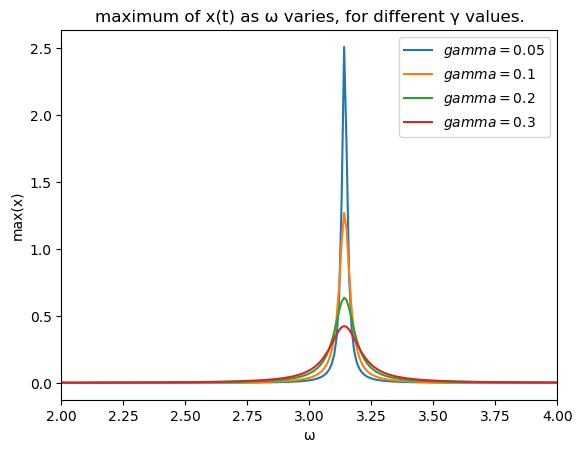

In [17]:
#Plotting, Q3.
γ_vec = [0.05, 0.1, 0.2, 0.3]
Ω = π
A = 0.1
x(γ,W) = (A*W*γ)/((Ω^2 - W^2)^2 + (W*γ/2)^2)
W_range = 0.02:0.01:(4*Ω)

for γ in γ_vec
x_m = [x(γ,W) for W in W_range]
plot(W_range, x_m)
title("maximum of x(t) as ω varies, for different γ values.")
xlabel("ω")
ylabel("max(x)")
xlim([2,4])
legend([L"gamma = 0.05",L"gamma = 0.1",L"gamma = 0.2",L"gamma=0.3"]);
end

As we are solving the same system in question 4, we should expect the same result. We find that it is the same, save the peaks in our result for this lab being less sharp. This is likely an artifect of the fourier transform, as it has trouble approximating sharp curves.

$\com{it isn't, but that's ok.}$

# C. Spectral analysis
## Loading and saving data
We start with an introduction to loading and saving data to file. Really there is nothing to it: there are fast open-source file standards and excellent libraries for reading and writing data to file. 

We will use `JLD2` for this purpose, but there are also packages that allow you to read and write to Matlab `.mat` files in Julia ([MATLAB.jl](https://github.com/JuliaInterop/MATLAB.jl)), and many other file formats. 

Install the package `JLD2`. This provides a file standard for Julia based on the open standard [HDF5 data format](https://en.wikipedia.org/wiki/Hierarchical_Data_Format).

Load the time vector `t` and the measured values at each time `data` from the file `exp_data.jld2` provided, using the command

```julia
@load "exp_data.jld2" data t
```

Make a scatter plot of `data` versus `t`: `scatter(t,data)`. What do you observe?

# Filtering
1. What is the nyquist frequency for this sampling rate?
2. Take the fourier transform of the data and plot versus the angular frequency appropriate for the given time vector. (use a `stem()` plot to help guide the eye).
3. Check that your transformed data and the original data obey Parseval's theorem.
4. Reconstruct the signal by filtering out what you think is noise on the signal. You will need to define a filter function that returns the signal only within a given range of frequencies. Plot the modulus squared of the filtered transform to check that your filter is doing its job.
5. Find the inverse Fourier Transform of the filtered spectrum, and construct the filtered signal in the time domain. What is the dominant frequency in the data that you predict from your frequency spectrum? Does your prediction agree with your filtered signal in the time domain? 

# PART C ANSWERS

the Δt = 0.06012024048096192

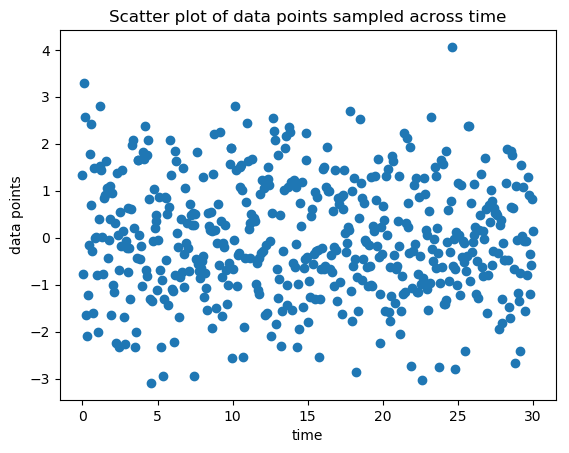


thus the nyquist frequency = 52.25515780471023

In [18]:
using JLD2, PyPlot, Formatting

@load "exp_data.jld2" data t
scatter(t,data)
xlabel("time")
ylabel("data points")
title("Scatter plot of data points sampled across time")

time_step = t[2] - t[1]
printfmt("the Δt = {}\n", time_step)
printfmt("thus the nyquist frequency = {}", pi/time_step)

Loading and saving data:

Observation: the data seems to be distributed randomly. There is no obvious pattern in the data. There is an outlier at 25 seconds. 

Filtering:

1.
The nyquist frequency is defined as $$\omega_c\equiv \frac{\pi}{\Delta t}$$

Our program outputs the $\Delta t = 0.06012024048096192$. Thus the Nyquist frequency (minimal resovable frequency to sample at) is = 52.25 rad/s

In Hz this is given by the formula $$f_n = \frac{1}{2\Delta t}$$

In [19]:
using JLD2

@load "exp_data.jld2" data t

dt(t)=t[2]-t[1]
Δt = dt(t)
nf = 1/(2*Δt)

8.316666666666666

So the nyquist frequency is 8.31 Hz

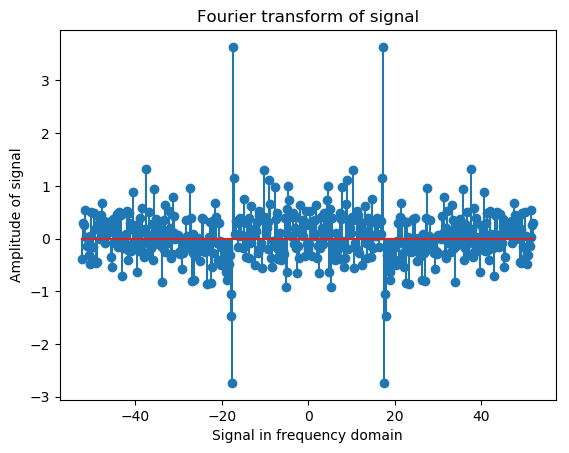

PyObject Text(0.5,1,'Fourier transform of signal')

In [20]:
#Filtering.. Question 2
using JLD2, PyPlot, Formatting

@load "exp_data.jld2" data t

dt(t)=t[2]-t[1]
dft(x,t)=fftshift(ifft(x))*length(t)*dt(t)/sqrt(2*pi)
idft(x,ω) =fft(ifftshift(x))*dt(ω)/sqrt(2*pi)
Δt = dt(t)

#transforming to frequency domain so we have to turn time to frequency
ω = linspace(-pi/Δt,pi/Δt,length(t)+1);ω=ω[1:end-1] |> collect;
stem(ω,dft(data,t))

xlabel("Signal in frequency domain")
ylabel("Amplitude of signal")
title("Fourier transform of signal")

In [21]:
#Filtering... Question 3
using JLD2, PyPlot, Formatting, Base.Test

@load "exp_data.jld2" data t

dt(t)=t[2]-t[1]
dft(x,t)=fftshift(ifft(x))*length(t)*dt(t)/sqrt(2*pi)
idft(x,ω) =fft(ifftshift(x))*dt(ω)/sqrt(2*pi)
Δt = dt(t)

#transforming to frequency domain so we have to turn time to frequency
ω = linspace(-pi/Δt,pi/Δt,length(t)+1);ω=ω[1:end-1] |> collect;
ω_data = dft(data,t)

#Checking parseval's Theorem
println("Now testing parseval's theorem.\nIs the power of the signal invarient under fourier transform up to machine precision?")
@test sum(abs2.(ω_data))*dt(ω)≈sum(abs2.(data))*dt(t) atol=1e^(-16)

Now testing parseval's theorem.
Is the power of the signal invarient under fourier transform up to machine precision?


Test Passed

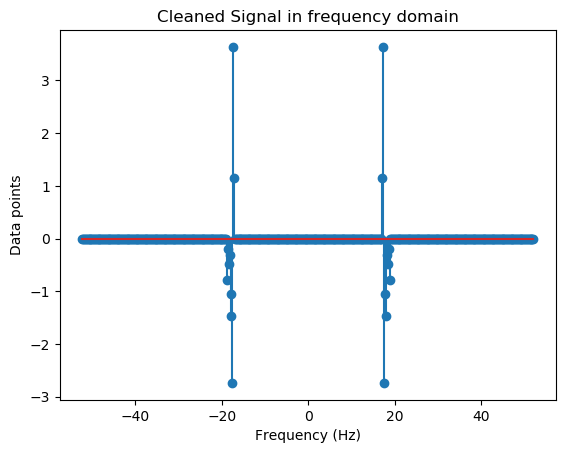

PyObject Text(0.5,1,'Cleaned Signal in frequency domain')

In [22]:
#Filtering... Question 4
using JLD2, PyPlot, Formatting

@load "exp_data.jld2" data t

dt(t)=t[2]-t[1]
dft(x,t)=fftshift(ifft(x))*length(t)*dt(t)/sqrt(2*pi)
idft(x,ω) =fft(ifftshift(x))*dt(ω)/sqrt(2*pi)
Δt = dt(t)

#transforming to frequency domain so we have to turn time to frequency
ω = linspace(-pi/Δt,pi/Δt,length(t)+1);ω=ω[1:end-1] |> collect;
ω_amp = dft(data,t)

#I will just define a high pass filter in the frequency domain
myfilter(F,ω1,ω2,ω)= (ω1<ω<ω2)? F:0.0 + 0.0*im
max1 = -18
max2 = 18
bw = 1
g1 = myfilter.(ω_amp,max1-bw,max1+bw,ω)
g2 = myfilter.(ω_amp,max2-bw,max2+bw,ω)
g3 = g1+g2

#Running the data through the high pass filter..
#filtering absolute value as the signal has negative components
ω_amp_cleaned = g3
plt1 = stem(ω,ω_amp_cleaned)

xlabel("Frequency (Hz)")
ylabel("Data points")
title("Cleaned Signal in frequency domain")

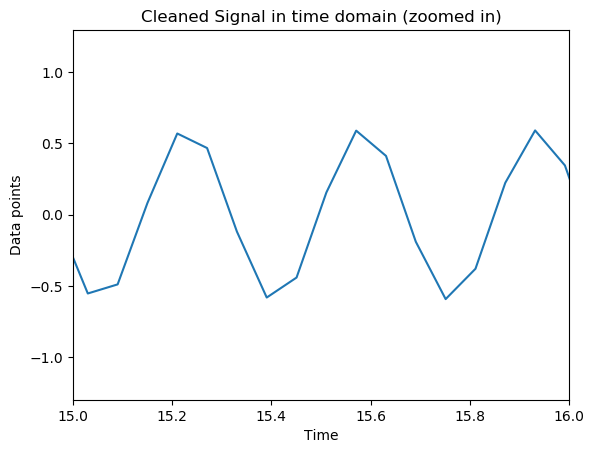

500

In [23]:
#Filtering... Question 5
using JLD2, PyPlot, Formatting

@load "exp_data.jld2" data t

dt(t)=t[2]-t[1]
dft(x,t)=fftshift(ifft(x))*length(t)*dt(t)/sqrt(2*pi)
idft(x,ω) =fft(ifftshift(x))*dt(ω)/sqrt(2*pi)
Δt = dt(t)

#transforming to frequency domain so we have to turn time to frequency
ω = linspace(-pi/Δt,pi/Δt,length(t)+1);ω=ω[1:end-1] |> collect;
ω_amp = dft(data,t)

#I will just define a bandpass filter in the frequency domain
myfilter(F,ω1,ω2,ω)= (ω1<ω<ω2)? F:0.0 + 0.0*im
max1 = -18
max2 = 18
bw = 0.5
g1 = myfilter.(ω_amp,max1-bw,max1+bw,ω)
g2 = myfilter.(ω_amp,max2-bw,max2+bw,ω)
g3 = g1+g2
ω_amp_cleaned = g3

xlabel("Time")
ylabel("Data points")
title("Cleaned Signal in time domain (zoomed in)")

#Now converting signal back into time domain...plotting cleaned signal
signal_amp = idft(ω_amp_cleaned,ω)
plt2 = plot(t,signal_amp)
xlim(15,16)
length(signal_amp)

We can calculate the dominant frequency of the signal from the formula 
$$f = \frac{2 \pi}{T}$$
We will have to estimate T graphically. If we traverse from the peak at $\approx 15.2$ to the peak at $\approx 15.6$ the period is $T=0.4$.
So we can then calculate $f=16.11$ which is in good agreement with our value generated graphically that we see above in the cleaned signal.

$\com{something wrong here, should get 17.3}$

# Aliasing
A theorist friend of yours has been trying their hand in the lab. They come to you with some data, and claim that they are pretty sure their apparatus isn't good enough to sample the periodic process they are trying to measure. 

The data, stored in `exp_data2.jld2` as `t2`, `data2` is noisy. 

1. Clean up the data, and plot a reconstructed signal. 
2. Make a reasoned suggestion for what you think the frequency of the physical process could be.

\[Hint: The DFT is periodic in time and frequency. Any signal that is down-sampled will be aliased into the measurable frequency range $[-\omega_c,\omega_c-\Delta \omega]$. The observed (aliased) frequency $\omega_a$ will be related to the signal $\omega_s$ by $\omega_s=\omega_a+2n\omega_c$, where $n$ is the smallest (possibly negative) multiple that moves $\omega_s\to\omega_a\in [-\omega_c,\omega_c-\Delta \omega]$. \]

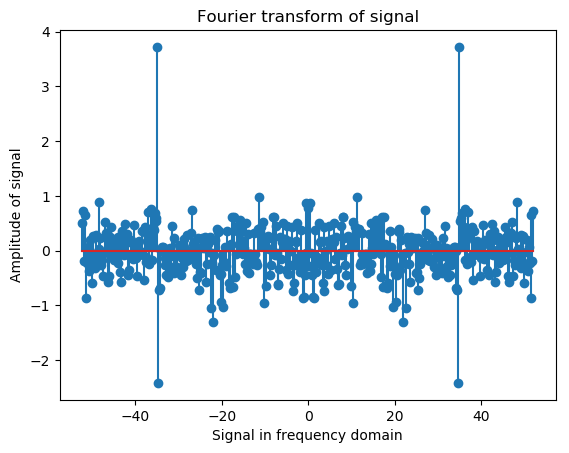

PyObject Text(0.5,1,'Fourier transform of signal')

In [24]:
#Aliasing
using JLD2, PyPlot, Formatting

@load "exp_data2.jld2" data2 t2

dt(t)=t[2]-t[1]
dft(x,t)=fftshift(ifft(x))*length(t)*dt(t)/sqrt(2*pi)
idft(x,ω) =fft(ifftshift(x))*dt(ω)/sqrt(2*pi)
Δt2 = dt(t2)
#calculating nyquist frequency, in hertz
nf = 1/2Δt2

#transforming to frequency domain so we have to turn time to frequency
ω = linspace(-pi/Δt2,pi/Δt2,length(t2)+1);ω=ω[1:end-1] |> collect;
stem(ω,dft(data2,t2))

xlabel("Signal in frequency domain")
ylabel("Amplitude of signal")
title("Fourier transform of signal")

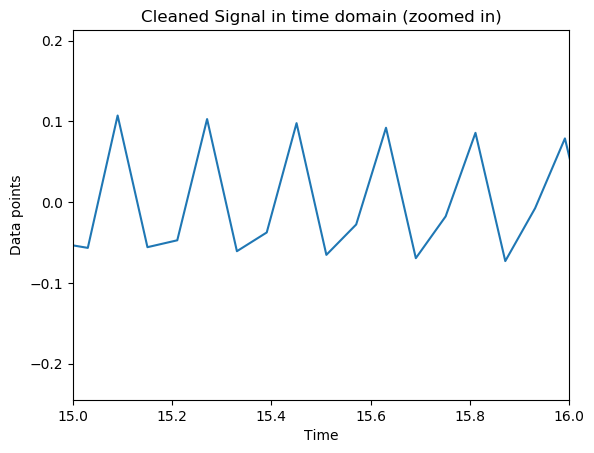

In [25]:
#Aliasing
using JLD2, PyPlot, Formatting

@load "exp_data2.jld2" data2 t2

dt(t)=t[2]-t[1]
dft(x,t)=fftshift(ifft(x))*length(t)*dt(t)/sqrt(2*pi)
idft(x,ω) =fft(ifftshift(x))*dt(ω)/sqrt(2*pi)
Δt2 = dt(t2)

#transforming to frequency domain so we have to turn time to frequency
ω = linspace(-pi/Δt2,pi/Δt2,length(t2)+1);ω=ω[1:end-1] |> collect;
ω_amp = dft(data,t2)

#I will just define a bandpass filter in the frequency domain
myfilter(F,ω1,ω2,ω)= (ω1<ω<ω2)? F:0.0 + 0.0*im
max1 = -34.9
max2 = 34.9
bw = 0.5
g1 = myfilter.(ω_amp,max1-bw,max1+bw,ω)
g2 = myfilter.(ω_amp,max2-bw,max2+bw,ω)
g3 = g1+g2
ω_amp_cleaned = g3

xlabel("Time")
ylabel("Data points")
title("Cleaned Signal in time domain (zoomed in)")

#Now converting signal back into time domain...plotting cleaned signal
signal_amp = idft(ω_amp_cleaned,ω)
plt2 = plot(t,signal_amp)
xlim(15,16)
length(signal_amp);

We can calculate the dominant frequency of the signal from the formula 
$$f = \frac{2 \pi}{T}$$ as before
We will have to estimate T graphically. If we traverse from the trough at $\approx 15.2$ to the trough at $\approx 15.4$ the period is roughly $T=0.18$

In [62]:
frequency = 2π/(0.18)

34.90658503988659

This is in good agreement with the dominant frequency that we can observe on the graph above. The problem with this is that the real dominant frequencies are not neccessarily the ones we observe. As given before they are related to the observed signal $\omega_a$ by $\omega_s=\omega_a+2n\omega_c$ where $\omega_c$ is the nyquist frequency. Our nyquist frequency in Hz is;

In [65]:
nf = 1/(2Δt2)

8.316666666666666

The problem with this is that there is no way to tell what the original frequencies of the non aliased signal were. Because there is no upper limit on n in the above equation, the frequency of 34.9 Hz that we observe could have been downshifted by aliasing from origninal one given by $34.9 + 2*n*\omega_c$

# D. Numerical differentiation 
One of the many uses of the FT is for fast and accurate numerical differentiation. We can see how this works by considering a function $f(x)$ of a single spatial variable. 

The FT's are 

$$F(k)\equiv \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty dx\;e^{-ikx}f(x)$$

and 

$$f(x)\equiv \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty dk\;e^{ikx}F(k)$$

Notice then that if we want to find $df/dx$, and we know $F(k)$, then we have

$$\frac{df}{dx}=\frac{d}{dx}\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty dk\;e^{ikx}F(k)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty dk\;e^{ikx}F(k)ik$$

In other words, we have found the Fourier Transform pair

$$\frac{df}{dx}\longleftrightarrow ikF(k)$$

and we see that the FT ___diagonalises the operator $d/dx$___.

A very common way to solve differential equations numerically is to utilise this relationship, and the fact that _numerically_, the [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform) algorithm can compute $F[k]$ from $f[j]$ with of order $  \sim N\ln{N}$ numerical operations $-$ much faster than the $\sim N^2$ operations to compute the action of a dense matrix representation of $d/dx$. 

In this section, you will investigate nearest neighbour differences, and the DFT as methods of numerical differentiation for the function

$$ f(x)=e^{-x^2}\cos{(15x)}$$

using 100 equally space points on the interval $[-5,5]$.

Compare the accuracy of the two approaches against the analytical form of derivative. You may find the function `diff()` helpfull for computing the nearest-neigbour differences.

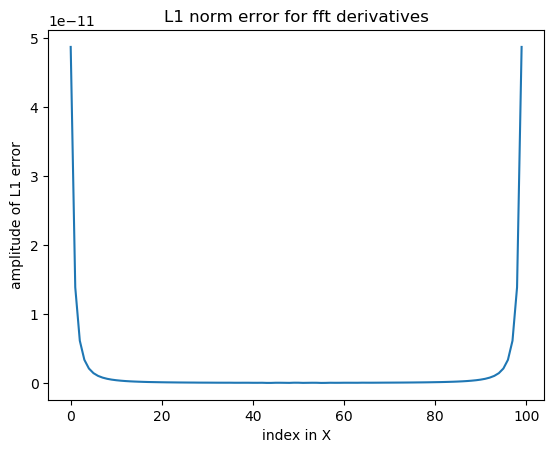

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fde1ebe5050>

In [5]:
using Formatting

#first finding the derivative analytically
f(x) = e^(-x^(2.0))*cos(15*x)
fd_analytic(x) = -e^(-x^(2.0))*(15*sin(15*x) + 2*x*cos(15*x))

xi = -5
xf = 5
N = 100
X = linspace(xi,xf,N) |> collect
X_plus = linspace(xi,xf,101) |> collect
FD_analytic = fd_analytic.(X)

#now doing finite difference method to approximate derivative...
#plot for length n-1
mydata = f.(X)
F = f.(X_plus)
FD_finite= diff(F)/(X[2] - X[1])

#now doing fft derivative method. we know f' = ikF(k)
dt(t)=t[2]-t[1]
dft(data,t)=fftshift(ifft(data))*N*dt(t)/sqrt(2*pi)
idft(data,ω) =fft(ifftshift(data))*dt(ω)/sqrt(2*pi)
ΔX = dt(X)
ω = linspace(-pi/ΔX,pi/ΔX,N+1);ω=ω[1:end-1] |> collect;
F_ω= dft(mydata,X)
FD_fft = idft(-im*ω.*F_ω,ω)

#finding the L1 norm between analytic and approximate methods
L1(x,y) = abs.((x - y))
finite_error = L1(FD_finite,FD_analytic);
fft_error = L1(FD_fft, FD_analytic);
xlabel("index in X")
ylabel("amplitude of L1 error")
title("L1 norm error for fft derivative")
plot(fft_error)

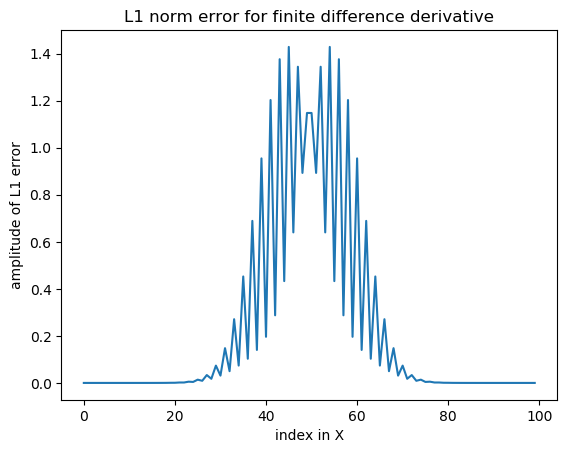

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fde1ebcbd50>

In [6]:
xlabel("index in X")
ylabel("amplitude of L1 error")
title("L1 norm error for finite difference derivative")
plot(finite_error)

The error for the finite difference method is much larger than the error for the fft derivative.

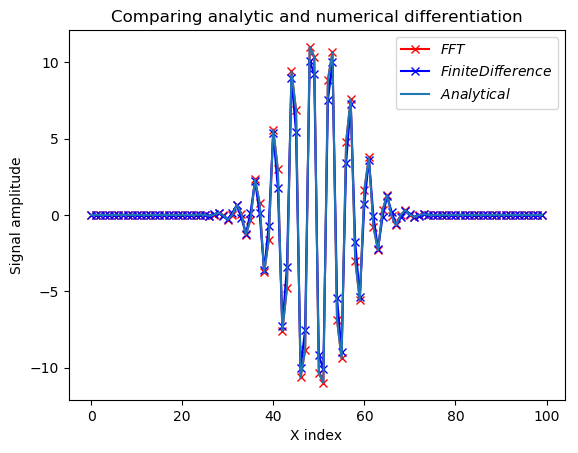

In [15]:
xlabel("X index")
ylabel("Signal amplitude")
plot(FD_fft,color="red",marker="x")
plot(FD_finite,color="blue",marker="x")
plot(FD_analytic)
title("Comparing analytic and numerical differentiation")
legend([L"FFT",L"FiniteDifference",L"Analytical"]);

So the numerical results are very similar to the analytical one. We can plot them as lines to show there is no visible difference between the FFT derivative and the analytical solution, and almost no difference between the finite difference and the analytical.

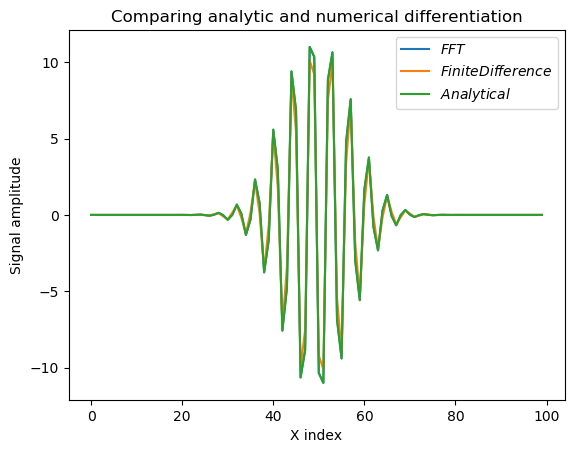

In [16]:
xlabel("X index")
ylabel("Signal amplitude")
plot(FD_fft)
plot(FD_finite)
plot(FD_analytic)
title("Comparing analytic and numerical differentiation")
legend([L"FFT",L"FiniteDifference",L"Analytical"]);

$\com{Nice work! 24/25}$